In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utility

### Load dataset

In [2]:
tf_data = Utility.load_dataset('dataset/','network_02.csv')

### Split dataset in training and test set

In [3]:
training, testing = tf_data.split(random_state=1234)
print(training, testing)

TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=4709183) TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=1177296)


### Build Knowledge Graph Embedding Model

In [4]:
import pykeen
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,4.15.0-159-generic
Time,Thu Mar 30 09:13:10 2023
Python,3.8.13
PyKEEN,1.10.2-dev
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,2.0.0+cu117
CUDA Available?,true


In [35]:
from pykeen.pipeline import pipeline
def create_model(tf_training, tf_testing, embedding, n_epoch, path):
    results = pipeline(
        training=tf_training,
        testing=tf_testing,
        model=embedding,
#         model_kwargs=dict(embedding_dim=2),
        training_loop='sLCWA',
        #         negative_sampler='bernoulli',
        negative_sampler_kwargs=dict(
            filtered=True,
        ),
        # Training configuration
        evaluation_kwargs=dict(batch_size=4),
        training_kwargs=dict(
            num_epochs=n_epoch,
            use_tqdm_batch=False,
            batch_size=4,
        ),
        # Runtime configuration
        random_seed=1235,
        device='gpu',
    )
    model = results.model
    results.save_to_directory(path + embedding)
    return model, results

In [5]:
model, results = Utility.create_model(training, testing, 'DistMult', 50, 'dataset/')

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.


/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.




Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=8.


Evaluating on cuda:0:   0%|          | 0.00/1.18M [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 34633.21s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=4709183) to file:///media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting%20Data/dataset/DistMult/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting Data/dataset/DistMult


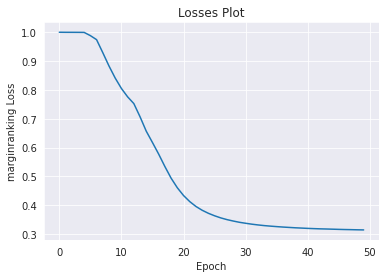

In [7]:
results.plot_losses()
plt.show()

In [8]:
model, results = Utility.create_model(training, testing, 'TransE', 50, 'dataset/')

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/1.18M [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 35590.72s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=4709183) to file:///media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting%20Data/dataset/TransE/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting Data/dataset/TransE


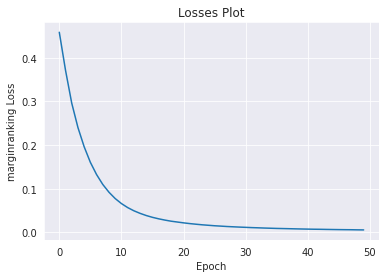

In [9]:
results.plot_losses()
plt.show()

In [5]:
model, results = Utility.create_model(training, testing, 'TransH', 50, 'dataset/')

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.


/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help` for usage information.




Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2.


Evaluating on cuda:0:   0%|          | 0.00/1.18M [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 71024.79s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=4709183) to file:///media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting%20Data/dataset/TransH/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting Data/dataset/TransH


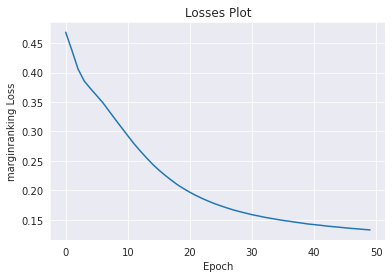

In [6]:
results.plot_losses()
plt.show()

In [7]:
results.metric_results.to_df()

,Side,Type,Metric,Value
0,head,optimistic,inverse_arithmetic_mean_rank,0.000007
1,tail,optimistic,inverse_arithmetic_mean_rank,0.000505
2,both,optimistic,inverse_arithmetic_mean_rank,0.000013
3,head,realistic,inverse_arithmetic_mean_rank,0.000007
4,tail,realistic,inverse_arithmetic_mean_rank,0.000505
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,0.727820
221,both,realistic,adjusted_hits_at_k,0.366985
222,head,pessimistic,adjusted_hits_at_k,0.006143
223,tail,pessimistic,adjusted_hits_at_k,0.727820


In [8]:
model, results = Utility.create_model(training, testing, 'ERMLP', 50, 'dataset/')

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/1.18M [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 49838.88s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=2497891, num_relations=20, create_inverse_triples=False, num_triples=4709183) to file:///media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting%20Data/dataset/ERMLP/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /media/rivas/Data1/Projects/CoyPU/CoyPu_SemEP/Extracting Data/dataset/ERMLP


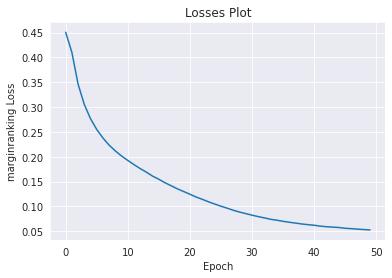

In [9]:
results.plot_losses()
plt.show()

In [ ]:
model, results = Utility.create_model(training, testing, 'RESCAL', 50, 'dataset/')

INFO:pykeen.pipeline.api:Using device: gpu


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=8.


Evaluating on cuda:0:   0%|          | 0.00/1.18M [00:00<?, ?triple/s]